<a href="https://colab.research.google.com/github/RishabhJha395/ML_Lab/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
df = pd.read_csv("titanic.csv")  # path to your file


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


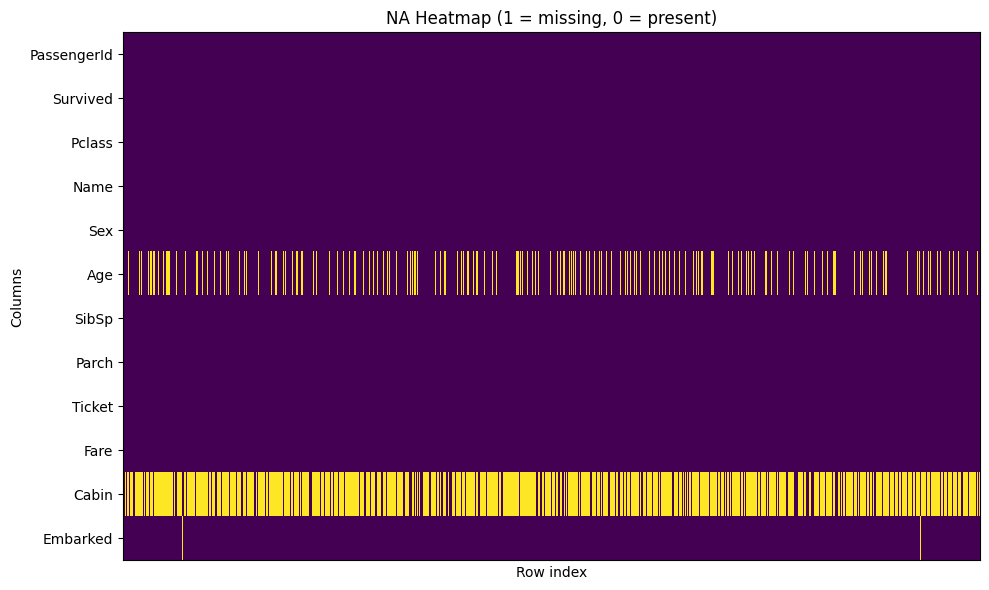

In [16]:
import numpy as np
import matplotlib.pyplot as plt

na_matrix = df.isna().astype(int).to_numpy().T  # columns as rows
plt.figure(figsize=(10,6))
plt.imshow(na_matrix, aspect="auto", interpolation="nearest")
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks([])  # omit cluttered row indices
plt.title("NA Heatmap (1 = missing, 0 = present)")
plt.xlabel("Row index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


In [17]:
clean = df.copy()

for col in ["Age", "Cabin", "Embarked", "Fare"]:
    clean[f"{col}_missing_flag"] = clean[col].isna().astype(int)


In [18]:
group_median_age = clean.groupby(["Sex", "Pclass"])["Age"].transform("median")
overall_median_age = clean["Age"].median()
clean["Age"] = clean["Age"].fillna(group_median_age).fillna(overall_median_age)


In [19]:
emb_mode = clean["Embarked"].mode(dropna=True)[0] if clean["Embarked"].notna().any() else "S"
clean["Embarked"] = clean["Embarked"].fillna(emb_mode)


In [20]:
clean["Cabin"] = clean["Cabin"].fillna("Unknown")


In [21]:
group_median_fare = clean.groupby("Pclass")["Fare"].transform("median")
overall_median_fare = clean["Fare"].median()
clean["Fare"] = clean["Fare"].fillna(group_median_fare).fillna(overall_median_fare)


In [22]:
q1 = clean["Fare"].quantile(0.25)
q3 = clean["Fare"].quantile(0.75)
iqr = q3 - q1
lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr

clean["Fare_outlier_flag"] = ((clean["Fare"] < lower) | (clean["Fare"] > upper)).astype(int)
clean["Fare"] = clean["Fare"].clip(lower, upper)


In [23]:
clean.to_csv("clean_v1.csv", index=False)
